# Titanic problem

## Data exploration

Objective is to find clear objectives between feature columns and label

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

### Reading in data

In [6]:
fil = r'data\train.csv'
df = pd.read_csv(fil)

### Basic data information

In [8]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Examining missing values

#### Age

In [10]:
# age
age_less_df = df[df.Age.isna()].copy()
age_less_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [12]:
# numeric values
age_less_df.describe().round()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.0,177.0,177.0,0.0,177.0,177.0,177.0
mean,436.0,0.0,3.0,NaN,1.0,0.0,22.0
std,251.0,0.0,1.0,NaN,2.0,1.0,32.0
min,6.0,0.0,1.0,NaN,0.0,0.0,0.0
25%,230.0,0.0,3.0,NaN,0.0,0.0,8.0
50%,452.0,0.0,3.0,NaN,0.0,0.0,8.0
75%,634.0,1.0,3.0,NaN,0.0,0.0,24.0
max,889.0,1.0,3.0,NaN,8.0,2.0,228.0


#

In [27]:
# categorical
categorical_columns = ['Sex','Cabin', 'Embarked','Pclass']
a =age_less_df[categorical_columns].nunique(dropna = False)
b = age_less_df[categorical_columns].count()
pd.DataFrame(data = {'unique':a, 'count':b})


,unique,count
Sex,2,177
Cabin,20,19
Embarked,3,177
Pclass,3,177


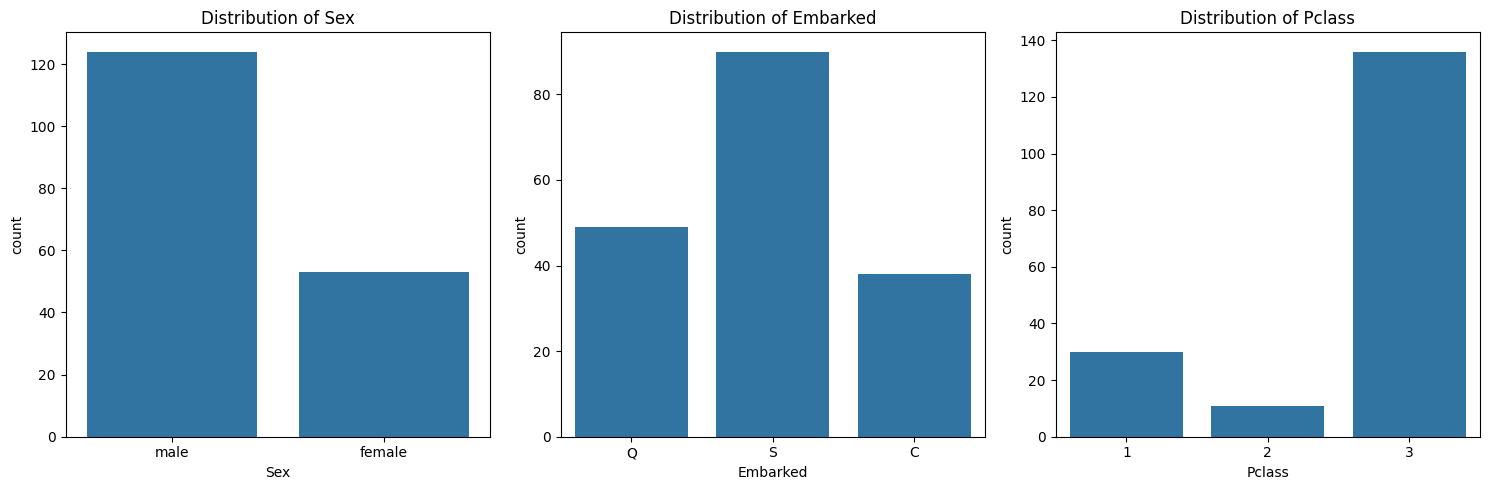

In [21]:
# Assuming your DataFrame is named age_less_df
categorical_columns = ['Sex', 'Embarked', 'Pclass']

# Create a figure and a set of subplots
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# Loop through the columns and create a subplot for each one
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)  # (1 row, n columns, ith subplot)
    sns.countplot(x=column, data=age_less_df)
    plt.title(f'Distribution of {column}')

plt.tight_layout()  # Adjust the layout
plt.show()


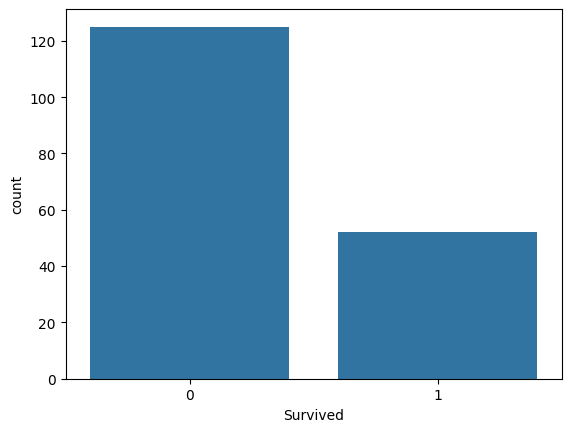

In [19]:
#survival rate
sns.countplot(x='Survived', data=age_less_df)
plt.show()